Linear Discriminant Analysis (LDA)

 The goal is to project/transform a dataset  A using a transformation matrix w such that the ratio of between class scatter to within class scatter of the transformed dataset is maximized.

 LDA is like PCA with the difference, that LDA aims to find the projection of maximum separability.

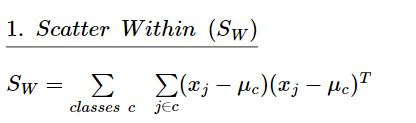

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


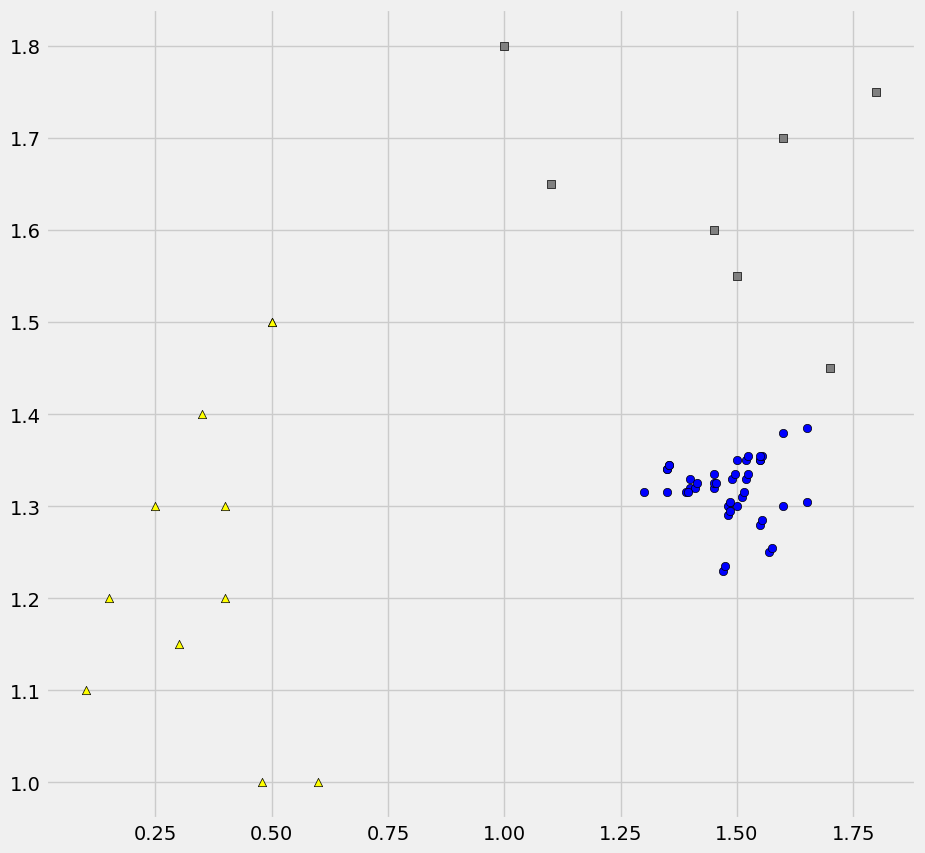

In [2]:
#fromscratch

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')


# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)
mean_circles = np.mean(circles,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)


# Mind that we do not calculate the covariance matrix here because then we have to divide by n or n-1 as shown below
#print((1/7)*np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T))
#print(np.var(rectangles[0],ddof=0))

scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles+scatter_circles+scatter_rectangles
print(SW)


plt.show()

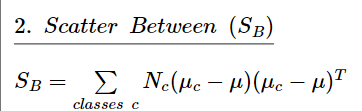

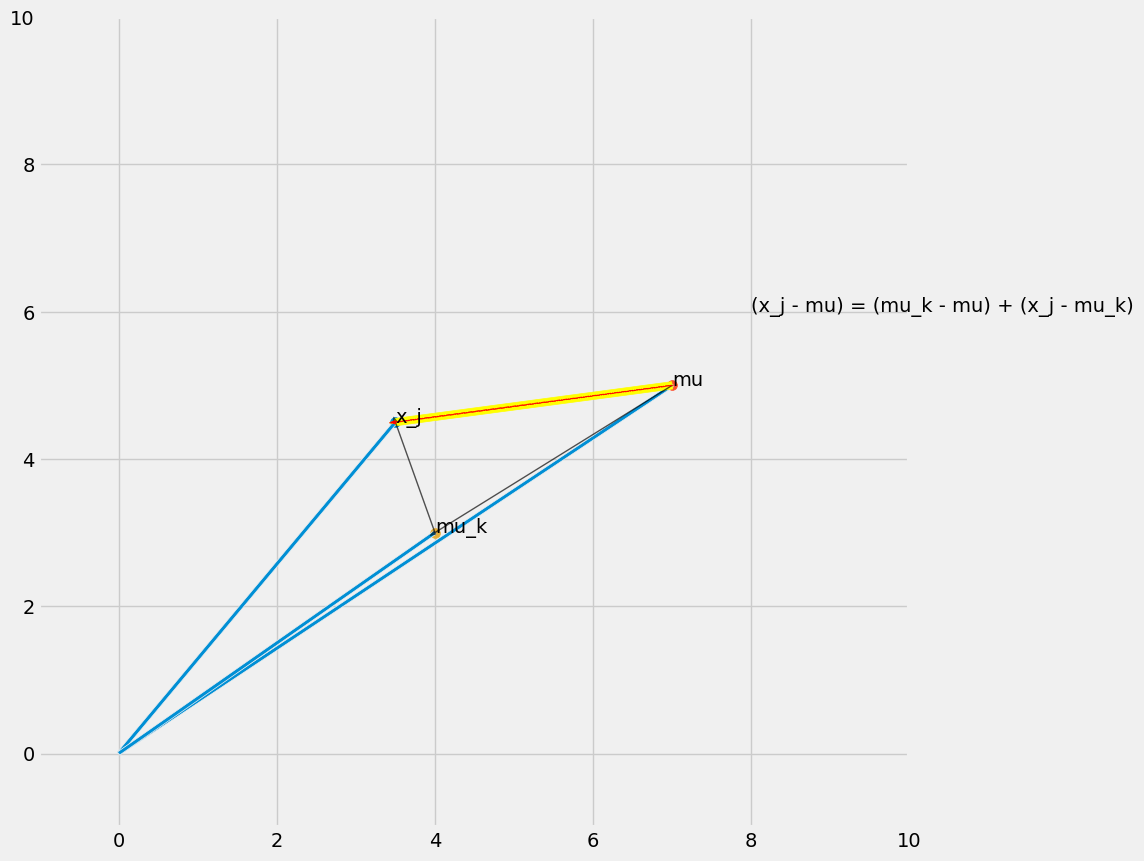

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



x_j = np.array([3.5,4.5])
mu = np.array([7,5])
mu_k = np.array([4,3])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)


for i in [x_j,mu,mu_k]:
    ax0.scatter(i[0],i[1],s=50)

ax0.annotate('x_j',x_j)
ax0.annotate('mu',mu)
ax0.annotate('mu_k',mu_k)
ax0.annotate('(x_j - mu) = (mu_k - mu) + (x_j - mu_k)',np.array(mu)+np.array([1,1]))

# Draw the position vectors 
for i in [x_j,mu,mu_k]:
    ax0.arrow(0,0,i[0],i[1],head_width=0.01,width=0.05)
    
# Draw the vectors
ax0.arrow(mu[0],mu[1],(x_j-mu)[0],(x_j-mu)[1],head_width=0.05,width=0.1,color='yellow') # xj_minus_mu
ax0.arrow(mu[0],mu[1],(mu_k-mu)[0],(mu_k-mu)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # mu_k_minus_mu
ax0.arrow(mu_k[0],mu_k[1],(x_j-mu_k)[0],(x_j-mu_k)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # xj_minus_mu_k

# If we now add up the vectors (mu_k-mu) and (x_j-mu_k) wee see that this vector alligns with the vector (x_k-mu)
mu_k_minus_mu = mu_k-mu
x_j_minus_mu_k = x_j-mu_k
res = (mu_k-mu)+(x_j-mu_k)
ax0.arrow(mu[0],mu[1],res[0],res[1],head_width=0.05,width=0.01,linestyle='-.',color='red')

plt.show()

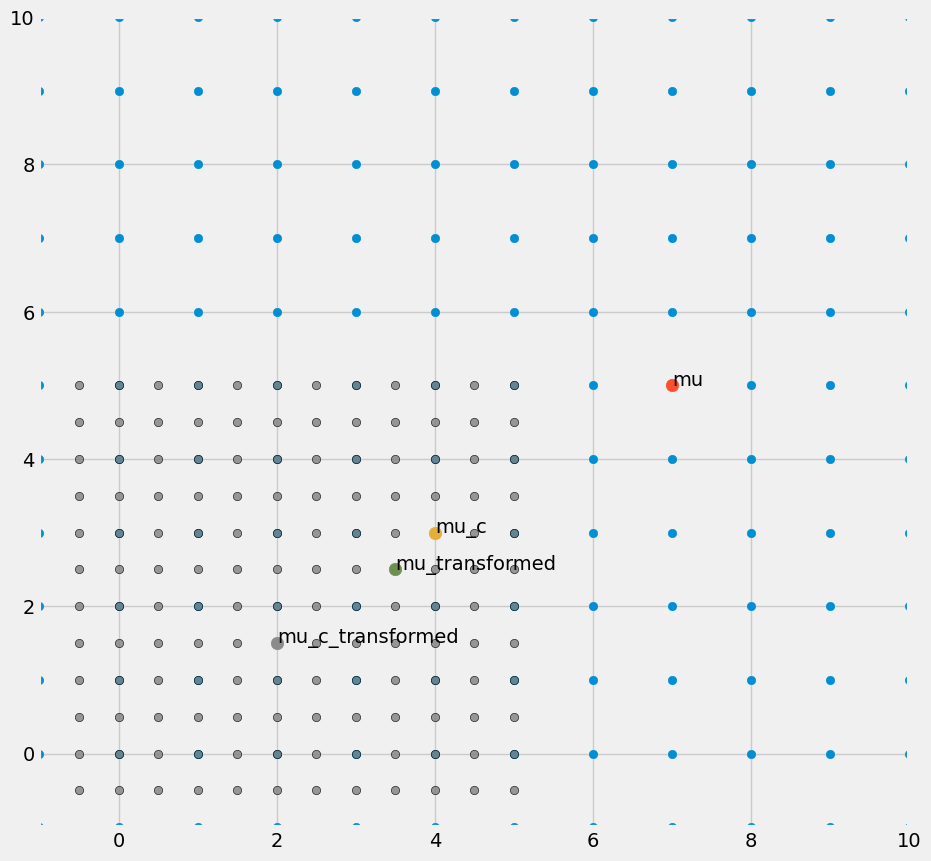

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



mu = np.array([7,5]).reshape(2,1)
mu_c = np.array([4,3]).reshape(2,1)


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)

# Plot the meshgrid
X,Y = np.meshgrid(np.linspace(-1,10,num=12),np.linspace(-1,10,num=12))
data = np.array([X.reshape(1,144),Y.reshape(1,144)]).reshape(2,144)


ax0.scatter(X,Y)


# Transform the data using w
w = np.array([[0.5,0],[0,0.5]])


data_trans = np.dot(data.T,w)
mu_trans = np.dot(mu.reshape(2,1).T,w).reshape(2,1)
mu_c_trans = np.dot(mu_c.reshape(2,1).T,w).reshape(2,1)
ax0.scatter(data_trans[:,0],data_trans[:,1],alpha=0.8,color='grey',edgecolor='black')


# Plot mu, mu_trans, mu_k, and mu_k_trans
# Plot mu and mu_k

for i in [mu,mu_c,mu_trans,mu_c_trans]:
    ax0.scatter(i[0],i[1],s=80)

ax0.annotate('mu',[mu[0],mu[1]])
ax0.annotate('mu_c',mu_k)
ax0.annotate('mu_c_transformed',mu_c_trans)
ax0.annotate('mu_transformed',mu_trans)


plt.show()

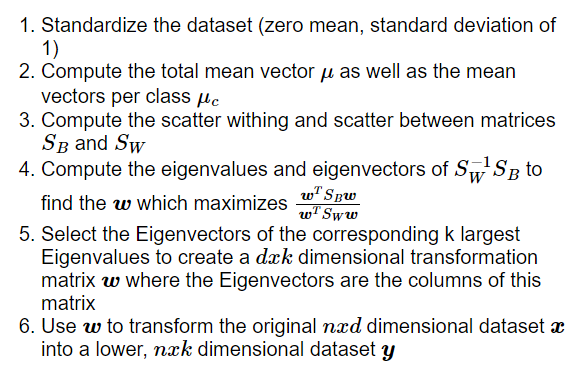

<timed exec>:68: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


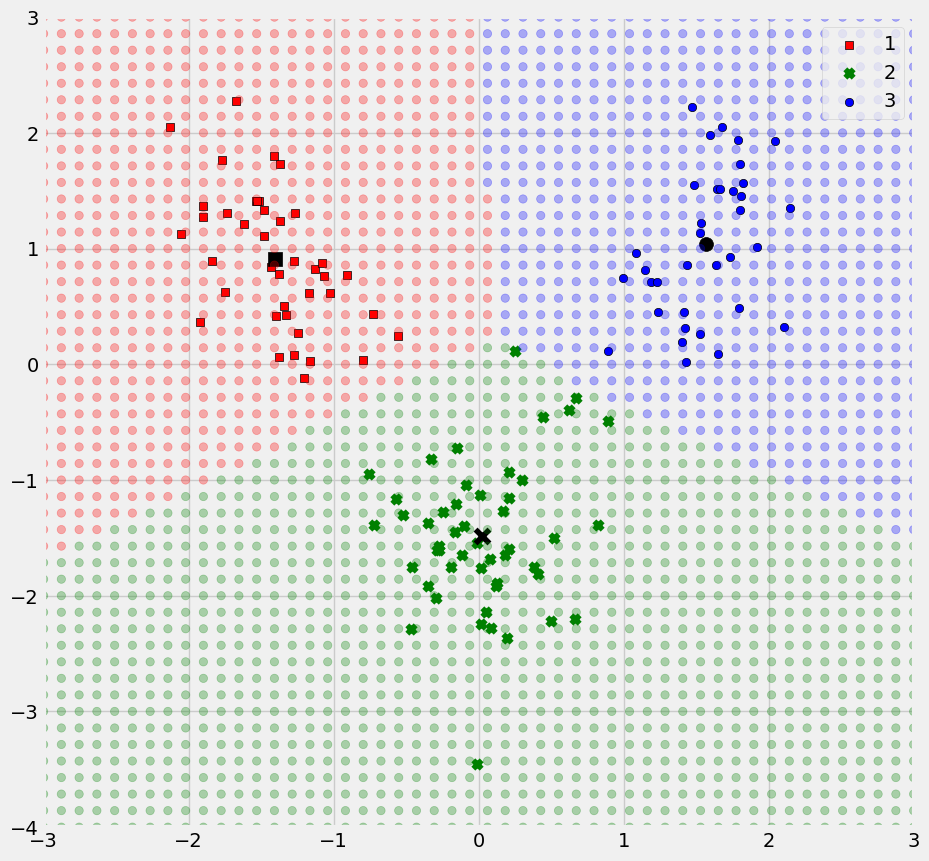

CPU times: total: 1.12 s
Wall time: 829 ms


<timed exec>:68: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


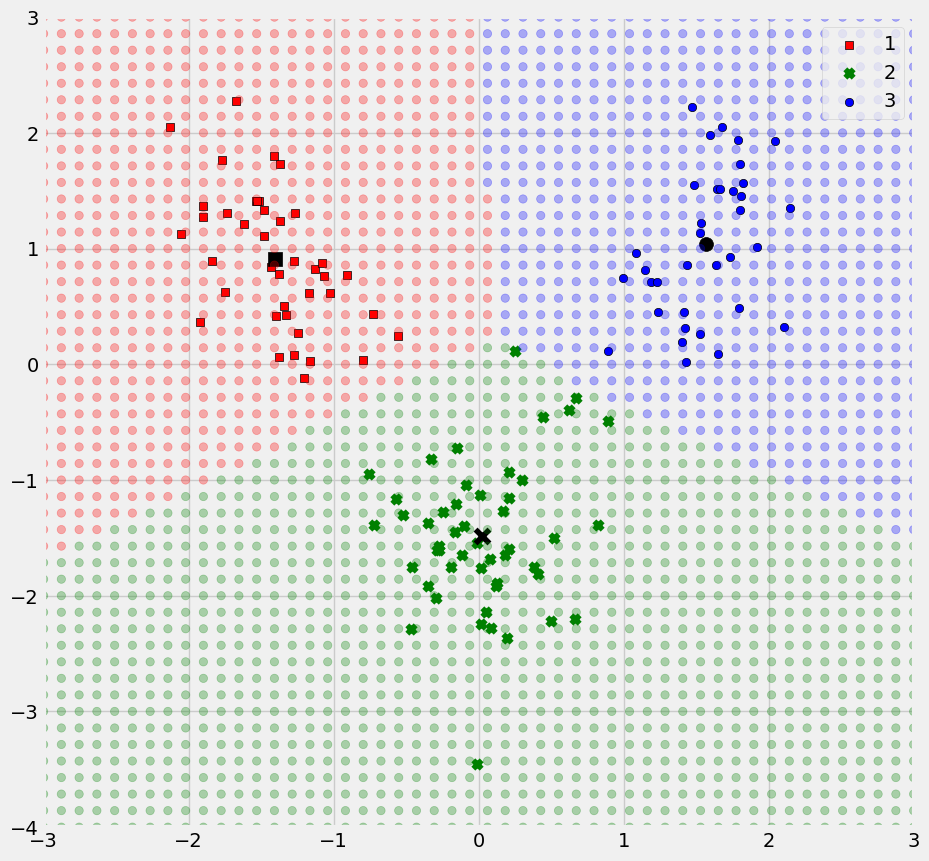

CPU times: total: 1.16 s
Wall time: 3.78 s


In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier

# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('Files/Wine/Wine.data',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 


# 1. Standardize the data
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))



# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 


mu_k = []

for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T


# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)
   
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


    
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


# Plot the voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()

Testing shit out with sklearn (Classifier)